
  Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl (625 kB)
Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl (2.8 MB)
Select an industry:
1: Information Technology
2: Industrials
3: Consumer Staples
4: Health Care
5: Materials
6: Communication Services
7: Consumer Discretionary
8: Energy
9: Utilities
10: Real Estate
11: Financials
You selected the industry: Energy
Select a company ticker from the following:
1: APA - APA Corporation
2: BKR - Baker Hughes
3: CVX - Chevron Corporation
4: COP - ConocoPhillips
5: CTRA - Coterra
6: DVN - Devon Energy
7: FANG - Diamondback Energy
8: EOG - EOG Resources
9: EQT - EQT Corporation
10: XOM - ExxonMobil
11: HAL - Halliburton
12: HES - Hess Corporation
13: KMI - Kinder Morgan
14: MRO - Marathon Oil
15: MPC - Marathon Petroleum
16: OXY - Occidental Petroleum
17: OKE - ONEOK
18: PSX - Phillips 66
19

[*********************100%***********************]  1 of 1 completed


ADF Statistic: -1.807886541367349
p-value: 0.3765533341289072
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5951.672, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5950.020, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5949.034, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5948.844, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5947.760, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5949.553, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5949.558, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5948.763, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5949.016, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5949.434, Time=1.17 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 3.352 seconds


c:\Users\jaosy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jaosy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


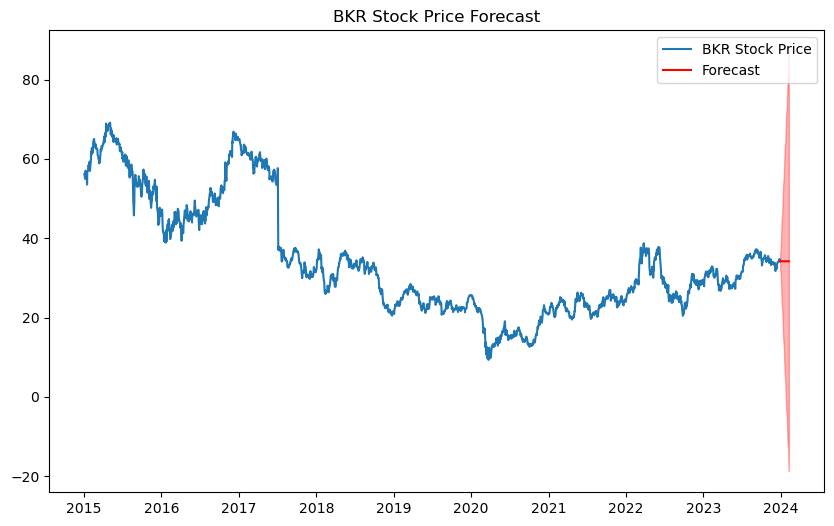

In [2]:
%pip install pmdarima 

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

# Function to fetch S&P 500 tickers and industries from Wikipedia
def get_sp500_tickers_and_industries():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url)
    df = tables[0]  # The first table contains the S&P 500 data
    df = df[['Symbol', 'GICS Sector', 'Security']]  # Select relevant columns
    tickers_data = df.set_index('Symbol')[['GICS Sector', 'Security']].to_dict(orient='index')  # Create a dictionary of tickers, sectors, and company names
    return tickers_data

# Function to fetch data for a list of tickers
def get_data(tickers):
    data = {}
    for ticker in tickers:
        try:
            df = yf.download(ticker, start="2010-01-01", end="2024-10-01")
            data[ticker] = df
        except Exception as e:
            print(f"Could not retrieve data for {ticker}: {e}")
    return data

# Function to select an industry and get its tickers
def industry_selection(tickers_data):
    print("Select an industry:")
    industry_options = set(data['GICS Sector'] for data in tickers_data.values())
    for idx, industry in enumerate(industry_options):
        print(f"{idx + 1}: {industry}")

    industry_choice = int(input("Enter the number of the industry you want to select: ")) - 1
    selected_industry = list(industry_options)[industry_choice]

    print(f"You selected the industry: {selected_industry}")
    
    selected_tickers = [(ticker, data['Security']) for ticker, data in tickers_data.items() if data['GICS Sector'] == selected_industry]
    return selected_tickers

# Function to get company information using Yahoo Finance
def get_company_info(ticker, company_name):
    stock = yf.Ticker(ticker)
    info = stock.info
    address1 = info.get('address1', 'N/A')
    address2 = info.get('address2', '')
    city = info.get('city', '')
    state = info.get('state', '')
    zip_code = info.get('zip', '')
    country = info.get('country', 'N/A')
    full_address = f"{address1}, {address2} {city}, {state} {zip_code}, {country}".strip(", ")
    full_time_employees = info.get('fullTimeEmployees', 'N/A')
    company_summary = info.get('longBusinessSummary', 'N/A')
    audit_risk = info.get('auditRisk', 'N/A')
    board_risk = info.get('boardRisk', 'N/A')
    compensation_risk = info.get('compensationRisk', 'N/A')
    shareholder_rights_risk = info.get('shareHolderRightsRisk', 'N/A')
    overall_risk = info.get('overallRisk', 'N/A')

    return full_address, full_time_employees, company_summary, {
        'Audit Risk': audit_risk,
        'Board Risk': board_risk,
        'Compensation Risk': compensation_risk,
        'Shareholder Rights Risk': shareholder_rights_risk,
        'Overall Risk': overall_risk
    }

# Function to forecast stock prices using ARIMA
def forecast_stock(ticker):
    print(f"\nFetching data for {ticker}...\n")
    stock_data = yf.download(ticker, start="2015-01-01", end="2024-01-01")

    # Augmented Dickey-Fuller test to check if time series is statonary
    result = sm.tsa.adfuller(stock_data['Close'])
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    stock_diff = stock_data['Close'].diff().dropna()
    arima_model = auto_arima(stock_diff, seasonal=False, trace=True, stepwise=True)

    # Forecast 30 business days
    n_periods = 30
    forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)
    forecast_dates = pd.date_range(stock_data.index[-1], periods=n_periods, freq='B')

    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label=f'{ticker} Stock Price')
    plt.plot(forecast_dates, forecast.cumsum() + stock_data['Close'].iloc[-1], label='Forecast', color='red')
    plt.fill_between(forecast_dates, 
                     conf_int[:, 0].cumsum() + stock_data['Close'].iloc[-1], 
                     conf_int[:, 1].cumsum() + stock_data['Close'].iloc[-1], 
                     color='red', alpha=0.3)
    plt.title(f'{ticker} Stock Price Forecast')
    plt.legend()
    plt.show()

# Main Execution
tickers_data = get_sp500_tickers_and_industries()
selected_tickers = industry_selection(tickers_data)

print("Select a company ticker from the following:")
for idx, (ticker, company_name) in enumerate(selected_tickers):
    print(f"{idx + 1}: {ticker} - {company_name}")

company_choice = int(input("Enter the number of the company you want to select: ")) - 1
selected_ticker, selected_company_name = selected_tickers[company_choice]

# Get and display company information
full_address, full_time_employees, company_summary, governance_risks = get_company_info(selected_ticker, selected_company_name)

print(f"\nCompany Information for {selected_company_name} ({selected_ticker}):")
print(f"Full Address: {full_address}")
print(f"Full-Time Employees: {full_time_employees}")
print(f"Company Summary: {company_summary}")
print("\nGovernance Risks:")
for key, value in governance_risks.items():
    print(f"{key}: {value}")

# Forecast the stock price of the selected company
forecast_stock(selected_ticker)

In [3]:
import yfinance as yf
import pandas as pd
import pickle
from pmdarima import auto_arima
import os

# Fetch S&P 500 tickers and industries from Wikipedia
def get_sp500_tickers_and_industries():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url)
    df = tables[0]  # The first table contains the S&P 500 data
    df = df[['Symbol', 'GICS Sector', 'Security']]  # Select relevant columns
    tickers_data = df.set_index('Symbol')[['GICS Sector', 'Security']].to_dict(orient='index')  # Create a dictionary of tickers, sectors, and company names
    return tickers_data

# Train ARIMA models for all stocks and store them in a dictionary
def train_all_arima_models(tickers_data, save_path='combined_arima_models.pkl'):
    all_models = {}  # Dictionary to hold all ARIMA models

    # Loop through each ticker
    for ticker, info in tickers_data.items():
        try:
            print(f"Processing {ticker}...")
            
            # Download historical stock data
            stock_data = yf.download(ticker, start="2015-01-01", end="2024-01-01")

            # Check if we have enough data to train the model
            if len(stock_data) < 100:  # Arbitrary threshold for sufficient data
                print(f"Skipping {ticker}: Not enough data")
                continue

            # Differencing to make the series stationary
            stock_diff = stock_data['Close'].diff().dropna()

            # Train an ARIMA model
            arima_model = auto_arima(stock_diff, seasonal=False, trace=False, stepwise=True)

            # Store the model in the dictionary
            all_models[ticker] = arima_model
            
        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    # Save the combined dictionary of models to a single file
    with open(save_path, 'wb') as f:
        pickle.dump(all_models, f)

    print(f"All models saved to {save_path}")

# Load the combined ARIMA model dictionary
def load_combined_arima_models(save_path='combined_arima_models.pkl'):
    with open(save_path, 'rb') as f:
        all_models = pickle.load(f)
    return all_models

# Main Execution
tickers_data = get_sp500_tickers_and_industries()

# Train and save all ARIMA models
train_all_arima_models(tickers_data)

# To load the models later, use:
# models = load_combined_arima_models()

Processing MMM...


[*********************100%***********************]  1 of 1 completed


Processing AOS...


[*********************100%***********************]  1 of 1 completed


Processing ABT...


[*********************100%***********************]  1 of 1 completed


Processing ABBV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ACN...


Processing ADBE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMD']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing AMD...
Skipping AMD: Not enough data
Processing AES...


[*********************100%***********************]  1 of 1 completed


Processing AFL...


[*********************100%***********************]  1 of 1 completed


Processing A...


[*********************100%***********************]  1 of 1 completed


Processing APD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ABNB...


Processing AKAM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ALB...



[*********************100%***********************]  1 of 1 completed

Processing ARE...



[*********************100%***********************]  1 of 1 completed

Processing ALGN...



[*********************100%***********************]  1 of 1 completed

Processing ALLE...



[*********************100%***********************]  1 of 1 completed

Processing LNT...



[*********************100%***********************]  1 of 1 completed

Processing ALL...



[*********************100%***********************]  1 of 1 completed

Processing GOOGL...



[*********************100%***********************]  1 of 1 completed

Processing GOOG...


Processing MO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AMZN...



[*********************100%***********************]  1 of 1 completed

Processing AMCR...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMTM']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing AMTM...
Skipping AMTM: Not enough data
Processing AEE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AEP...



[*********************100%***********************]  1 of 1 completed

Processing AXP...



[*********************100%***********************]  1 of 1 completed

Processing AIG...


Processing AMT...


[*********************100%***********************]  1 of 1 completed


Processing AWK...


[*********************100%***********************]  1 of 1 completed


Processing AMP...


[*********************100%***********************]  1 of 1 completed


Processing AME...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AMGN...



[*********************100%***********************]  1 of 1 completed

Processing APH...



[*********************100%***********************]  1 of 1 completed

Processing ADI...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ANSS']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing ANSS...
Skipping ANSS: Not enough data
Processing AON...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing APA...


Processing AAPL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AMAT...


Processing APTV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ACGL...


Processing ADM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ANET...


Processing AJG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AIZ...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['T']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing T...
Skipping T: Not enough data
Processing ATO...


[*********************100%***********************]  1 of 1 completed


Processing ADSK...


[*********************100%***********************]  1 of 1 completed


Processing ADP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AZO...


Processing AVB...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AVY...



[*********************100%***********************]  1 of 1 completed

Processing AXON...



[*********************100%***********************]  1 of 1 completed

Processing BKR...



[*********************100%***********************]  1 of 1 completed

Processing BALL...



[*********************100%***********************]  1 of 1 completed

Processing BAC...


Processing BAX...


[*********************100%***********************]  1 of 1 completed


Processing BDX...


[*********************100%***********************]  1 of 1 completed


Processing BRK.B...


Failed to get ticker 'BRK.B' reason: HTTPSConnectionPool(host='query1.finance.yahoo.com', port=443): Read timed out. (read timeout=10)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Skipping BRK.B: Not enough data
Processing BBY...


[*********************100%***********************]  1 of 1 completed


Processing TECH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing BIIB...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BLK']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing BLK...
Skipping BLK: Not enough data
Processing BX...


[*********************100%***********************]  1 of 1 completed


Processing BK...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing BA...



[*********************100%***********************]  1 of 1 completed

Processing BKNG...



[*********************100%***********************]  1 of 1 completed

Processing BWA...



[*********************100%***********************]  1 of 1 completed

Processing BSX...


Processing BMY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing AVGO...



[*********************100%***********************]  1 of 1 completed

Processing BR...


Processing BRO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2024-01-01)')
[*********************100%***********************]  1 of 1 completed

Processing BF.B...
Skipping BF.B: Not enough data
Processing BLDR...



[*********************100%***********************]  1 of 1 completed

Processing BG...



[*********************100%***********************]  1 of 1 completed

Processing BXP...


Processing CHRW...


[*********************100%***********************]  1 of 1 completed


Processing CDNS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CZR...


Processing CPT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CPB...



[*********************100%***********************]  1 of 1 completed

Processing COF...


Processing CAH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing KMX...


Processing CCL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CARR...



[*********************100%***********************]  1 of 1 completed

Processing CTLT...


Processing CAT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CBOE...


Processing CBRE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CDW...


Processing CE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing COR...



[*********************100%***********************]  1 of 1 completed

Processing CNC...


Processing CNP...


[*********************100%***********************]  1 of 1 completed


Processing CF...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CRL...


Processing SCHW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CHTR...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CVX']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
[*********************100%***********************]  1 of 1 completed

Processing CVX...
Skipping CVX: Not enough data
Processing CMG...



[*********************100%***********************]  1 of 1 completed

Processing CB...


Processing CHD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CI...



[*********************100%***********************]  1 of 1 completed

Processing CINF...



[*********************100%***********************]  1 of 1 completed

Processing CTAS...


Processing CSCO...


[*********************100%***********************]  1 of 1 completed


Processing C...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CFG...



[*********************100%***********************]  1 of 1 completed

Processing CLX...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CME']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing CME...
Skipping CME: Not enough data
Processing CMS...


[*********************100%***********************]  1 of 1 completed


Processing KO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CTSH...


Processing CL...


[*********************100%***********************]  1 of 1 completed


Processing CMCSA...


[*********************100%***********************]  1 of 1 completed


Processing CAG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing COP...


Processing ED...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['STZ']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
[*********************100%***********************]  1 of 1 completed

Processing STZ...
Skipping STZ: Not enough data
Processing CEG...



[*********************100%***********************]  1 of 1 completed

Processing COO...


Processing CPRT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing GLW...



[*********************100%***********************]  1 of 1 completed

Processing CPAY...



[*********************100%***********************]  1 of 1 completed

Processing CTVA...



[*********************100%***********************]  1 of 1 completed

Processing CSGP...



[*********************100%***********************]  1 of 1 completed

Processing COST...



[*********************100%***********************]  1 of 1 completed

Processing CTRA...



[*********************100%***********************]  1 of 1 completed

Processing CRWD...


Processing CCI...


[*********************100%***********************]  1 of 1 completed


Processing CSX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CMI...


Processing CVS...


[*********************100%***********************]  1 of 1 completed


Processing DHR...


[*********************100%***********************]  1 of 1 completed


Processing DRI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing DVA...



[*********************100%***********************]  1 of 1 completed

Processing DAY...



[*********************100%***********************]  1 of 1 completed

Processing DECK...



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['DE']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing DE...
Skipping DE: Not enough data
Processing DELL...


[*********************100%***********************]  1 of 1 completed


Processing DAL...


[*********************100%***********************]  1 of 1 completed


Processing DVN...


[*********************100%***********************]  1 of 1 completed


Processing DXCM...


[*********************100%***********************]  1 of 1 completed


Processing FANG...


[*********************100%***********************]  1 of 1 completed


Processing DLR...


[*********************100%***********************]  1 of 1 completed


Processing DFS...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['DFS']: ConnectionError(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out."))


Skipping DFS: Not enough data
Processing DG...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['DG']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


Skipping DG: Not enough data
Processing DLTR...


[*********************100%***********************]  1 of 1 completed


Processing D...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing DPZ...


Processing DOV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing DOW...


Processing DHI...


[*********************100%***********************]  1 of 1 completed


Processing DTE...


[*********************100%***********************]  1 of 1 completed


Processing DUK...


[*********************100%***********************]  1 of 1 completed


Processing DD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing EMN...


Processing ETN...


[*********************100%***********************]  1 of 1 completed


Processing EBAY...


[*********************100%***********************]  1 of 1 completed


Processing ECL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['EIX']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing EIX...
Skipping EIX: Not enough data
Processing EW...


[*********************100%***********************]  1 of 1 completed


Processing EA...


[*********************100%***********************]  1 of 1 completed


Processing ELV...


[*********************100%***********************]  1 of 1 completed


Processing EMR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ENPH...


Processing ETR...


[*********************100%***********************]  1 of 1 completed


Processing EOG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing EPAM...


Processing EQT...


[*********************100%***********************]  1 of 1 completed


Processing EFX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing EQIX...



[*********************100%***********************]  1 of 1 completed

Processing EQR...



[*********************100%***********************]  1 of 1 completed

Processing ERIE...



[*********************100%***********************]  1 of 1 completed

Processing ESS...



[*********************100%***********************]  1 of 1 completed

Processing EL...



[*********************100%***********************]  1 of 1 completed

Processing EG...


Processing EVRG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ES']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Processing ES...
Skipping ES: Not enough data
Processing EXC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing EXPE...


Processing EXPD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing EXR...



[*********************100%***********************]  1 of 1 completed

Processing XOM...



[*********************100%***********************]  1 of 1 completed

Processing FFIV...



[*********************100%***********************]  1 of 1 completed

Processing FDS...



[*********************100%***********************]  1 of 1 completed

Processing FICO...


Processing FAST...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing FRT...


Processing FDX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing FIS...


Processing FITB...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FITB']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


Skipping FITB: Not enough data
Processing FSLR...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FSLR']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A0A3290>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FE']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

Skipping FSLR: Not enough data
Processing FE...
Skipping FE: Not enough data
Processing FI...
Skipping FI: Not enough data
Processing FMC...
Skipping FMC: Not enough data
Processing F...
Skipping F: Not enough data
Processing FTNT...
Skipping FTNT: Not enough data
Processing FTV...
Skipping FTV: Not enough data
Processing FOXA...
Skipping FOXA: Not enough data
Processing FOX...
Skipping FOX: Not enough data
Processing BEN...
Skipping BEN: Not enough data
Processing FCX...
Skipping FCX: Not enough data
Processing GRMN...
Skipping GRMN: Not enough data
Processing IT...




1 Failed download:
['IT']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001655DD9C860>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GE']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000016574143560>: Failed to resolve \'query2.fin

Skipping IT: Not enough data
Processing GE...
Skipping GE: Not enough data
Processing GEHC...
Skipping GEHC: Not enough data
Processing GEV...
Skipping GEV: Not enough data
Processing GEN...
Skipping GEN: Not enough data
Processing GNRC...
Skipping GNRC: Not enough data
Processing GD...
Skipping GD: Not enough data
Processing GIS...
Skipping GIS: Not enough data
Processing GM...
Skipping GM: Not enough data
Processing GPC...
Skipping GPC: Not enough data
Processing GILD...
Skipping GILD: Not enough data
Processing GPN...
Skipping GPN: Not enough data
Processing GL...
Skipping GL: Not enough data
Processing GDDY...




1 Failed download:
['GDDY']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A0A2630>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GS']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000016566D93440>: Failed to resolve \'query2.f

Skipping GDDY: Not enough data
Processing GS...
Skipping GS: Not enough data
Processing HAL...
Skipping HAL: Not enough data
Processing HIG...
Skipping HIG: Not enough data
Processing HAS...
Skipping HAS: Not enough data
Processing HCA...
Skipping HCA: Not enough data
Processing DOC...
Skipping DOC: Not enough data
Processing HSIC...
Skipping HSIC: Not enough data
Processing HSY...
Skipping HSY: Not enough data
Processing HES...
Skipping HES: Not enough data
Processing HPE...
Skipping HPE: Not enough data
Processing HLT...




1 Failed download:
['HLT']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001655DC55D30>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HOLX']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000165740D11F0>: Failed to resolve \'query2.

Skipping HLT: Not enough data
Processing HOLX...
Skipping HOLX: Not enough data
Processing HD...
Skipping HD: Not enough data
Processing HON...
Skipping HON: Not enough data
Processing HRL...
Skipping HRL: Not enough data
Processing HST...
Skipping HST: Not enough data
Processing HWM...
Skipping HWM: Not enough data
Processing HPQ...
Skipping HPQ: Not enough data
Processing HUBB...
Skipping HUBB: Not enough data
Processing HUM...
Skipping HUM: Not enough data
Processing HBAN...
Skipping HBAN: Not enough data
Processing HII...
Skipping HII: Not enough data
Processing IBM...




1 Failed download:
['IBM']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000016574141040>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IEX']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000016566D1D010>: Failed to resolve \'query2.f

Skipping IBM: Not enough data
Processing IEX...
Skipping IEX: Not enough data
Processing IDXX...
Skipping IDXX: Not enough data
Processing ITW...
Skipping ITW: Not enough data
Processing INCY...
Skipping INCY: Not enough data
Processing IR...
Skipping IR: Not enough data
Processing PODD...
Skipping PODD: Not enough data
Processing INTC...
Skipping INTC: Not enough data
Processing ICE...
Skipping ICE: Not enough data
Processing IFF...
Skipping IFF: Not enough data
Processing IP...
Skipping IP: Not enough data
Processing IPG...
Skipping IPG: Not enough data
Processing INTU...




1 Failed download:
['INTU']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000016574142A80>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ISRG']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001653CA92F00>: Failed to resolve \'query2

Skipping INTU: Not enough data
Processing ISRG...
Skipping ISRG: Not enough data
Processing IVZ...
Skipping IVZ: Not enough data
Processing INVH...
Skipping INVH: Not enough data
Processing IQV...
Skipping IQV: Not enough data
Processing IRM...
Skipping IRM: Not enough data
Processing JBHT...
Skipping JBHT: Not enough data
Processing JBL...
Skipping JBL: Not enough data
Processing JKHY...
Skipping JKHY: Not enough data
Processing J...
Skipping J: Not enough data
Processing JNJ...
Skipping JNJ: Not enough data
Processing JCI...
Skipping JCI: Not enough data
Processing JPM...


['JPM']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A1683E0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['JNPR']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A168CE0>: Failed to resolve \'query2.finance.yahoo.com\' (

Skipping JPM: Not enough data
Processing JNPR...
Skipping JNPR: Not enough data
Processing K...
Skipping K: Not enough data
Processing KVUE...
Skipping KVUE: Not enough data
Processing KDP...
Skipping KDP: Not enough data
Processing KEY...
Skipping KEY: Not enough data
Processing KEYS...
Skipping KEYS: Not enough data
Processing KMB...
Skipping KMB: Not enough data
Processing KIM...
Skipping KIM: Not enough data
Processing KMI...
Skipping KMI: Not enough data
Processing KKR...




1 Failed download:
['KKR']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A16A3C0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['KLAC']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A16ADE0>: Failed to resolve \'query2.

Skipping KKR: Not enough data
Processing KLAC...
Skipping KLAC: Not enough data
Processing KHC...
Skipping KHC: Not enough data
Processing KR...
Skipping KR: Not enough data
Processing LHX...
Skipping LHX: Not enough data
Processing LH...
Skipping LH: Not enough data
Processing LRCX...
Skipping LRCX: Not enough data
Processing LW...
Skipping LW: Not enough data
Processing LVS...
Skipping LVS: Not enough data
Processing LDOS...
Skipping LDOS: Not enough data
Processing LEN...
Skipping LEN: Not enough data
Processing LLY...
Skipping LLY: Not enough data
Processing LIN...




1 Failed download:
['LIN']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001655FDC4830>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LYV']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A16B5C0>: Failed to resolve \'query2.f

Skipping LIN: Not enough data
Processing LYV...
Skipping LYV: Not enough data
Processing LKQ...
Skipping LKQ: Not enough data
Processing LMT...
Skipping LMT: Not enough data
Processing L...
Skipping L: Not enough data
Processing LOW...
Skipping LOW: Not enough data
Processing LULU...
Skipping LULU: Not enough data
Processing LYB...
Skipping LYB: Not enough data
Processing MTB...
Skipping MTB: Not enough data
Processing MRO...
Skipping MRO: Not enough data
Processing MPC...
Skipping MPC: Not enough data
Processing MKTX...
Skipping MKTX: Not enough data
Processing MAR...
Skipping MAR: Not enough data
Processing MMC...




1 Failed download:
['MMC']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A0A1D90>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MLM']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657417E900>: Failed to resolve \'query2.f

Skipping MMC: Not enough data
Processing MLM...
Skipping MLM: Not enough data
Processing MAS...
Skipping MAS: Not enough data
Processing MA...
Skipping MA: Not enough data
Processing MTCH...




1 Failed download:
['MTCH']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A168320>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MKC']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A1691F0>: Failed to resolve \'query2.

Skipping MTCH: Not enough data
Processing MKC...
Skipping MKC: Not enough data
Processing MCD...
Skipping MCD: Not enough data
Processing MCK...
Skipping MCK: Not enough data
Processing MDT...
Skipping MDT: Not enough data
Processing MRK...




1 Failed download:
['MRK']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A16BD70>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['META']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A168320>: Failed to resolve \'query2.

Skipping MRK: Not enough data
Processing META...
Skipping META: Not enough data
Processing MET...
Skipping MET: Not enough data
Processing MTD...
Skipping MTD: Not enough data
Processing MGM...
Skipping MGM: Not enough data
Processing MCHP...
Skipping MCHP: Not enough data
Processing MU...
Skipping MU: Not enough data
Processing MSFT...
Skipping MSFT: Not enough data
Processing MAA...




1 Failed download:
['MAA']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A14C350>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MRNA']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657417F7A0>: Failed to resolve \'query2.

Skipping MAA: Not enough data
Processing MRNA...
Skipping MRNA: Not enough data
Processing MHK...
Skipping MHK: Not enough data
Processing MOH...
Skipping MOH: Not enough data
Processing TAP...
Skipping TAP: Not enough data
Processing MDLZ...
Skipping MDLZ: Not enough data
Processing MPWR...
Skipping MPWR: Not enough data
Processing MNST...
Skipping MNST: Not enough data
Processing MCO...
Skipping MCO: Not enough data
Processing MS...
Skipping MS: Not enough data
Processing MOS...
Skipping MOS: Not enough data
Processing MSI...
Skipping MSI: Not enough data
Processing MSCI...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MSCI']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657417F6B0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NDAQ']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPS

Skipping MSCI: Not enough data
Processing NDAQ...
Skipping NDAQ: Not enough data
Processing NTAP...
Skipping NTAP: Not enough data
Processing NFLX...
Skipping NFLX: Not enough data
Processing NEM...
Skipping NEM: Not enough data
Processing NWSA...
Skipping NWSA: Not enough data
Processing NWS...
Skipping NWS: Not enough data
Processing NEE...
Skipping NEE: Not enough data
Processing NKE...
Skipping NKE: Not enough data
Processing NI...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NDSN']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A16A3F0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NSC']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSC

Skipping NI: Not enough data
Processing NDSN...
Skipping NDSN: Not enough data
Processing NSC...
Skipping NSC: Not enough data
Processing NTRS...
Skipping NTRS: Not enough data
Processing NOC...
Skipping NOC: Not enough data
Processing NCLH...
Skipping NCLH: Not enough data
Processing NRG...
Skipping NRG: Not enough data
Processing NUE...
Skipping NUE: Not enough data
Processing NVDA...
Skipping NVDA: Not enough data
Processing NVR...
Skipping NVR: Not enough data
Processing NXPI...
Skipping NXPI: Not enough data
Processing ORLY...
Skipping ORLY: Not enough data
Processing OXY...




1 Failed download:
['OXY']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000016574140C80>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ODFL']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A150FB0>: Failed to resolve \'query2.

Skipping OXY: Not enough data
Processing ODFL...
Skipping ODFL: Not enough data
Processing OMC...
Skipping OMC: Not enough data
Processing ON...
Skipping ON: Not enough data
Processing OKE...
Skipping OKE: Not enough data
Processing ORCL...
Skipping ORCL: Not enough data
Processing OTIS...
Skipping OTIS: Not enough data
Processing PCAR...
Skipping PCAR: Not enough data
Processing PKG...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PKG']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A14D610>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PLTR']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSC

Skipping PKG: Not enough data
Processing PLTR...
Skipping PLTR: Not enough data
Processing PANW...
Skipping PANW: Not enough data
Processing PARA...
Skipping PARA: Not enough data
Processing PH...
Skipping PH: Not enough data
Processing PAYX...
Skipping PAYX: Not enough data
Processing PAYC...
Skipping PAYC: Not enough data
Processing PYPL...
Skipping PYPL: Not enough data
Processing PNR...
Skipping PNR: Not enough data
Processing PEP...
Skipping PEP: Not enough data
Processing PFE...
Skipping PFE: Not enough data
Processing PCG...




1 Failed download:
['PCG']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A0965D0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PM']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A0977A0>: Failed to resolve \'query2.fi

Skipping PCG: Not enough data
Processing PM...
Skipping PM: Not enough data
Processing PSX...
Skipping PSX: Not enough data
Processing PNW...
Skipping PNW: Not enough data
Processing PNC...
Skipping PNC: Not enough data
Processing POOL...
Skipping POOL: Not enough data
Processing PPG...
Skipping PPG: Not enough data
Processing PPL...
Skipping PPL: Not enough data
Processing PFG...
Skipping PFG: Not enough data
Processing PG...
Skipping PG: Not enough data
Processing PGR...
Skipping PGR: Not enough data
Processing PLD...
Skipping PLD: Not enough data
Processing PRU...




1 Failed download:
['PRU']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001656BFC0B30>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PEG']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000016574140380>: Failed to resolve \'query2.f

Skipping PRU: Not enough data
Processing PEG...
Skipping PEG: Not enough data
Processing PTC...
Skipping PTC: Not enough data
Processing PSA...
Skipping PSA: Not enough data
Processing PHM...
Skipping PHM: Not enough data
Processing QRVO...
Skipping QRVO: Not enough data
Processing PWR...
Skipping PWR: Not enough data
Processing QCOM...
Skipping QCOM: Not enough data
Processing DGX...
Skipping DGX: Not enough data
Processing RL...
Skipping RL: Not enough data
Processing RJF...
Skipping RJF: Not enough data
Processing RTX...


['RTX']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A0A3020>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['O']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A14E840>: Failed to resolve \'query2.finance.yahoo.com\' ([Er

Skipping RTX: Not enough data
Processing O...
Skipping O: Not enough data
Processing REG...
Skipping REG: Not enough data
Processing REGN...
Skipping REGN: Not enough data
Processing RF...
Skipping RF: Not enough data
Processing RSG...
Skipping RSG: Not enough data
Processing RMD...
Skipping RMD: Not enough data
Processing RVTY...
Skipping RVTY: Not enough data
Processing ROK...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ROK']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000165740D2A20>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ROL']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

Skipping ROK: Not enough data
Processing ROL...
Skipping ROL: Not enough data
Processing ROP...
Skipping ROP: Not enough data
Processing ROST...
Skipping ROST: Not enough data
Processing RCL...
Skipping RCL: Not enough data
Processing SPGI...
Skipping SPGI: Not enough data
Processing CRM...
Skipping CRM: Not enough data
Processing SBAC...
Skipping SBAC: Not enough data
Processing SLB...




1 Failed download:
['SLB']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000016570FD1400>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['STX']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A097B60>: Failed to resolve \'query2.f

Skipping SLB: Not enough data
Processing STX...
Skipping STX: Not enough data
Processing SRE...
Skipping SRE: Not enough data
Processing NOW...
Skipping NOW: Not enough data
Processing SHW...
Skipping SHW: Not enough data
Processing SPG...
Skipping SPG: Not enough data
Processing SWKS...
Skipping SWKS: Not enough data
Processing SJM...
Skipping SJM: Not enough data
Processing SW...
Skipping SW: Not enough data
Processing SNA...
Skipping SNA: Not enough data
Processing SOLV...
Skipping SOLV: Not enough data
Processing SO...
Skipping SO: Not enough data
Processing LUV...




1 Failed download:
['LUV']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000165710BA570>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SWK']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000165740D2CF0>: Failed to resolve \'query2.f

Skipping LUV: Not enough data
Processing SWK...
Skipping SWK: Not enough data
Processing SBUX...
Skipping SBUX: Not enough data
Processing STT...
Skipping STT: Not enough data
Processing STLD...
Skipping STLD: Not enough data
Processing STE...
Skipping STE: Not enough data
Processing SYK...
Skipping SYK: Not enough data
Processing SMCI...
Skipping SMCI: Not enough data
Processing SYF...
Skipping SYF: Not enough data
Processing SNPS...
Skipping SNPS: Not enough data
Processing SYY...
Skipping SYY: Not enough data
Processing TMUS...
Skipping TMUS: Not enough data
Processing TROW...




1 Failed download:
['TROW']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A14F170>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TTWO']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A095640>: Failed to resolve \'query2

Skipping TROW: Not enough data
Processing TTWO...
Skipping TTWO: Not enough data
Processing TPR...
Skipping TPR: Not enough data
Processing TRGP...
Skipping TRGP: Not enough data
Processing TGT...
Skipping TGT: Not enough data
Processing TEL...
Skipping TEL: Not enough data
Processing TDY...
Skipping TDY: Not enough data
Processing TFX...
Skipping TFX: Not enough data
Processing TER...
Skipping TER: Not enough data
Processing TSLA...
Skipping TSLA: Not enough data
Processing TXN...
Skipping TXN: Not enough data
Processing TXT...
Skipping TXT: Not enough data
Processing TMO...




1 Failed download:
['TMO']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000165710BAAE0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TJX']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000165740D2300>: Failed to resolve \'query2.f

Skipping TMO: Not enough data
Processing TJX...
Skipping TJX: Not enough data
Processing TSCO...
Skipping TSCO: Not enough data
Processing TT...
Skipping TT: Not enough data
Processing TDG...
Skipping TDG: Not enough data
Processing TRV...
Skipping TRV: Not enough data
Processing TRMB...
Skipping TRMB: Not enough data
Processing TFC...
Skipping TFC: Not enough data
Processing TYL...
Skipping TYL: Not enough data
Processing TSN...
Skipping TSN: Not enough data
Processing USB...




1 Failed download:
['USB']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A14FBF0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['UBER']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001656BF58530>: Failed to resolve \'query2.

Skipping USB: Not enough data
Processing UBER...
Skipping UBER: Not enough data
Processing UDR...
Skipping UDR: Not enough data
Processing ULTA...
Skipping ULTA: Not enough data
Processing UNP...
Skipping UNP: Not enough data
Processing UAL...
Skipping UAL: Not enough data
Processing UPS...
Skipping UPS: Not enough data
Processing URI...
Skipping URI: Not enough data
Processing UNH...
Skipping UNH: Not enough data
Processing UHS...




1 Failed download:
['UHS']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A151220>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VLO']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A1686E0>: Failed to resolve \'query2.f

Skipping UHS: Not enough data
Processing VLO...
Skipping VLO: Not enough data
Processing VTR...
Skipping VTR: Not enough data
Processing VLTO...
Skipping VLTO: Not enough data
Processing VRSN...
Skipping VRSN: Not enough data
Processing VRSK...




1 Failed download:
['VRSK']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A1516A0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VZ']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A152CF0>: Failed to resolve \'query2.f

Skipping VRSK: Not enough data
Processing VZ...
Skipping VZ: Not enough data
Processing VRTX...
Skipping VRTX: Not enough data
Processing VTRS...
Skipping VTRS: Not enough data
Processing VICI...
Skipping VICI: Not enough data
Processing V...
Skipping V: Not enough data
Processing VST...
Skipping VST: Not enough data
Processing VMC...




1 Failed download:
['VMC']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A095D90>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['WRB']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A150A70>: Failed to resolve \'query2.f

Skipping VMC: Not enough data
Processing WRB...
Skipping WRB: Not enough data
Processing GWW...
Skipping GWW: Not enough data
Processing WAB...
Skipping WAB: Not enough data
Processing WBA...
Skipping WBA: Not enough data
Processing WMT...
Skipping WMT: Not enough data
Processing DIS...
Skipping DIS: Not enough data
Processing WBD...
Skipping WBD: Not enough data
Processing WM...
Skipping WM: Not enough data
Processing WAT...


['WAT']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000165741428A0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['WEC']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000016570F6E870>: Failed to resolve \'query2.finance.yahoo.com\' ([

Skipping WAT: Not enough data
Processing WEC...
Skipping WEC: Not enough data
Processing WFC...
Skipping WFC: Not enough data
Processing WELL...
Skipping WELL: Not enough data
Processing WST...
Skipping WST: Not enough data
Processing WDC...
Skipping WDC: Not enough data
Processing WY...
Skipping WY: Not enough data
Processing WMB...
Skipping WMB: Not enough data
Processing WTW...
Skipping WTW: Not enough data
Processing WYNN...
Skipping WYNN: Not enough data
Processing XEL...
Skipping XEL: Not enough data
Processing XYL...




1 Failed download:
['XYL']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000165740D32C0>: Failed to resolve \'query2.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['YUM']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query2.finance.yahoo.com\', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1420088400&period2=1704085200&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=sK4l77pf0SG (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001657A12D610>: Failed to resolve \'query2.f

Skipping XYL: Not enough data
Processing YUM...
Skipping YUM: Not enough data
Processing ZBRA...
Skipping ZBRA: Not enough data
Processing ZBH...
Skipping ZBH: Not enough data
Processing ZTS...
Skipping ZTS: Not enough data
All models saved to combined_arima_models.pkl
